In [1]:
import warnings
warnings.filterwarnings("ignore")

from collections import OrderedDict
from os.path import join, isfile
from datetime import datetime
from deepburtsev.core.pipeline_manager import PipelineManager
from deepburtsev.core.datasets.dataset_readers import read_sber_dataset
from deepburtsev.core.utils import scrab_data, get_table, plot_i, plot_k

Using TensorFlow backend.


Instructions for updating:
Use the retry module or similar alternatives.


2018-04-19 19:58:37.662 WARNING in 'tensorflow'['tf_logging'] at line 126: From /home/mks/envs/intent_script/lib/python3.6/site-packages/tensorflow/contrib/learn/python/learn/datasets/base.py:198: retry (from tensorflow.contrib.learn.python.learn.datasets.base) is deprecated and will be removed in a future version.
Instructions for updating:
Use the retry module or similar alternatives.
2018-04-19 19:58:37.980 DEBUG in 'matplotlib.backends'['__init__'] at line 90: backend module://ipykernel.pylab.backend_inline version unknown


### Скачиваешь ембеддинг по ссылке ниже, и суёшь его в папку с эмбеддингами. Датасет уже лежит где надо.

http://lnsigo.mipt.ru/export/embeddings/ft_native_300_ru_wiki_lenta_nltk_word_tokenize/ft_native_300_ru_wiki_lenta_nltk_word_tokenize.bin

In [2]:
root = '/home/mks/projects/DeepBurtsev/'
language = 'russian'
dataset_name = 'sber'
file_name = 'sber.csv'
emb_name = 'ft_native_300_ru_wiki_lenta_nltk_word_tokenize.bin'
emb_dim = 300
date = datetime.now()

file_path = join(root, 'data', language, dataset_name, 'data', file_name)
pure_data = read_sber_dataset(file_path)

In [3]:
# Здесь написаны словари по которым задётся структура пайплайна, и то какие его элементы нужно перебирать.
# Для нейронных моделей, и для линейных.
neural_struct = {'Lemmatizer': [False, True], 'model': ['CNN']}
neural_pipe = OrderedDict(Tokenizer=True,
                          Lemmatizer=True,
                          vectorizer='FasttextVectorizer',
                          model='CNN',
                          Resulter='Resulter')

linear_struct = {'Lemmatizer': [False, True],
                 'vectorizer': ['tf-idf', 'count'],
                 'model': ['LogisticRegression',
                           'RandomForestClassifier',
                           'LGBMClassifier',
                           'LinearSVC']}
linear_pipe = OrderedDict(Tokenizer=True,
                          Lemmatizer=True,
                          Textсoncatenator=True,
                          vectorizer='tf-idf',
                          model='LogisticRegression',
                          Resulter='Resulter')

neural
/home/mks/projects/DeepBurtsev/


  8%|▊         | 780/9322 [00:00<00:01, 7790.94it/s]

[ Starting vectorization ... ]
[ Vectorization of train part of dataset ... ]


  0%|          | 0/1080 [00:00<?, ?it/s]

[ Vectorization of valid part of dataset ... ]
[ Vectorization of test part of dataset ... ]


100%|██████████| 1080/1080 [00:00<00:00, 7299.77it/s]


[ Vectorization was ended. ]
[ Initializing intent_model from scratch ]
Instructions for updating:
keep_dims is deprecated, use keepdims instead


2018-04-19 19:58:44.752 WARNING in 'tensorflow'['tf_logging'] at line 126: From /home/mks/envs/intent_script/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:1247: calling reduce_sum (from tensorflow.python.ops.math_ops) with keep_dims is deprecated and will be removed in a future version.
Instructions for updating:
keep_dims is deprecated, use keepdims instead


Instructions for updating:
`NHWC` for data_format is deprecated, use `NWC` instead


2018-04-19 19:58:44.768 WARNING in 'tensorflow'['tf_logging'] at line 126: From /home/mks/envs/intent_script/lib/python3.6/site-packages/tensorflow/python/util/deprecation.py:497: calling conv1d (from tensorflow.python.ops.nn_ops) with data_format=NHWC is deprecated and will be removed in a future version.
Instructions for updating:
`NHWC` for data_format is deprecated, use `NWC` instead


Instructions for updating:
keep_dims is deprecated, use keepdims instead


2018-04-19 19:58:44.808 WARNING in 'tensorflow'['tf_logging'] at line 126: From /home/mks/envs/intent_script/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:1213: calling reduce_max (from tensorflow.python.ops.math_ops) with keep_dims is deprecated and will be removed in a future version.
Instructions for updating:
keep_dims is deprecated, use keepdims instead


Instructions for updating:
keep_dims is deprecated, use keepdims instead


2018-04-19 19:58:45.8 WARNING in 'tensorflow'['tf_logging'] at line 126: From /home/mks/envs/intent_script/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:1349: calling reduce_mean (from tensorflow.python.ops.math_ops) with keep_dims is deprecated and will be removed in a future version.
Instructions for updating:
keep_dims is deprecated, use keepdims instead



____Training over 9322 samples____




2018-04-19 19:58:45.622 WARNING in 'tensorflow'['tf_logging'] at line 160: Variable *= will be deprecated. Use variable.assign_mul if you want assignment to the variable value or 'x = x * y' if you want a new python Tensor object.


train -->	updates: 1	loss: 0.18686112761497498	fmeasure: 0.0	 
epochs_done: 1


2018-04-19 19:59:04.206 INFO in 'pymorphy2.opencorpora_dict.wrapper'['wrapper'] at line 16: Loading dictionaries from /home/mks/envs/intent_script/lib/python3.6/site-packages/pymorphy2_dicts/data
2018-04-19 19:59:04.231 INFO in 'pymorphy2.opencorpora_dict.wrapper'['wrapper'] at line 20: format: 2.4, revision: 393442, updated: 2015-01-17T16:03:56.586168


neural
/home/mks/projects/DeepBurtsev/


  9%|▉         | 884/9342 [00:00<00:00, 8834.66it/s]

[ Starting vectorization ... ]
[ Vectorization of train part of dataset ... ]


  0%|          | 0/1070 [00:00<?, ?it/s]

[ Vectorization of valid part of dataset ... ]
[ Vectorization of test part of dataset ... ]


100%|██████████| 1070/1070 [00:00<00:00, 7628.09it/s]


[ Vectorization was ended. ]
[ Initializing intent_model from scratch ]

____Training over 9342 samples____


train -->	updates: 1	loss: 0.18604162335395813	fmeasure: 0.0	 
epochs_done: 1
neural
/home/mks/projects/DeepBurtsev/


2018-04-19 19:59:30.369 DEBUG in 'matplotlib.font_manager'['font_manager'] at line 1354: findfont: Matching :family=sans-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0 to DejaVu Sans ('/home/mks/intent/lib/python3.6/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf') with score of 0.050000
2018-04-19 19:59:30.394 DEBUG in 'matplotlib.font_manager'['font_manager'] at line 1354: findfont: Matching :family=sans-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=12.0 to DejaVu Sans ('/home/mks/intent/lib/python3.6/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf') with score of 0.050000
2018-04-19 19:59:31.413 DEBUG in 'matplotlib.font_manager'['font_manager'] at line 1354: findfont: Matching :family=sans-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=16.0 to DejaVu Sans ('/home/mks/intent/lib/python3.6/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf') with score of 0.050000
2018-04-19 19:59:31.70

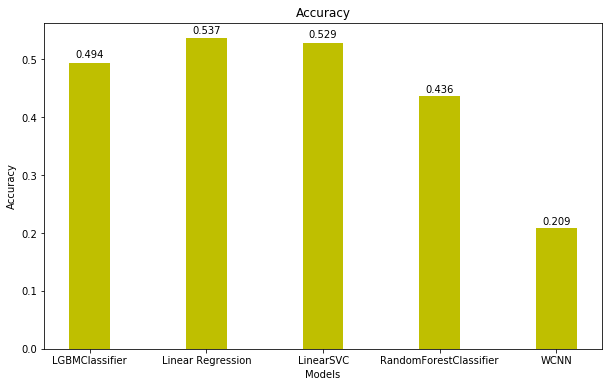

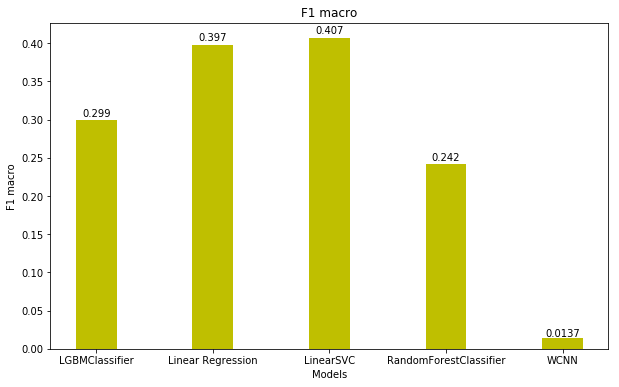

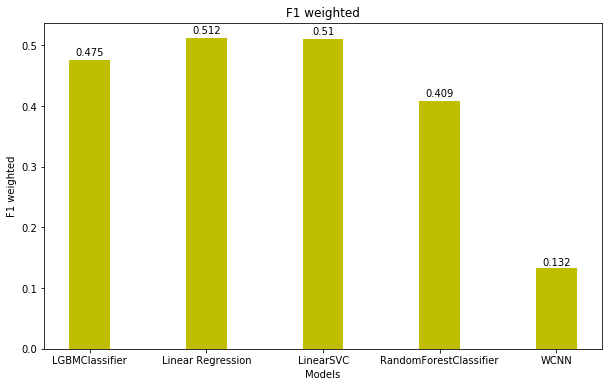

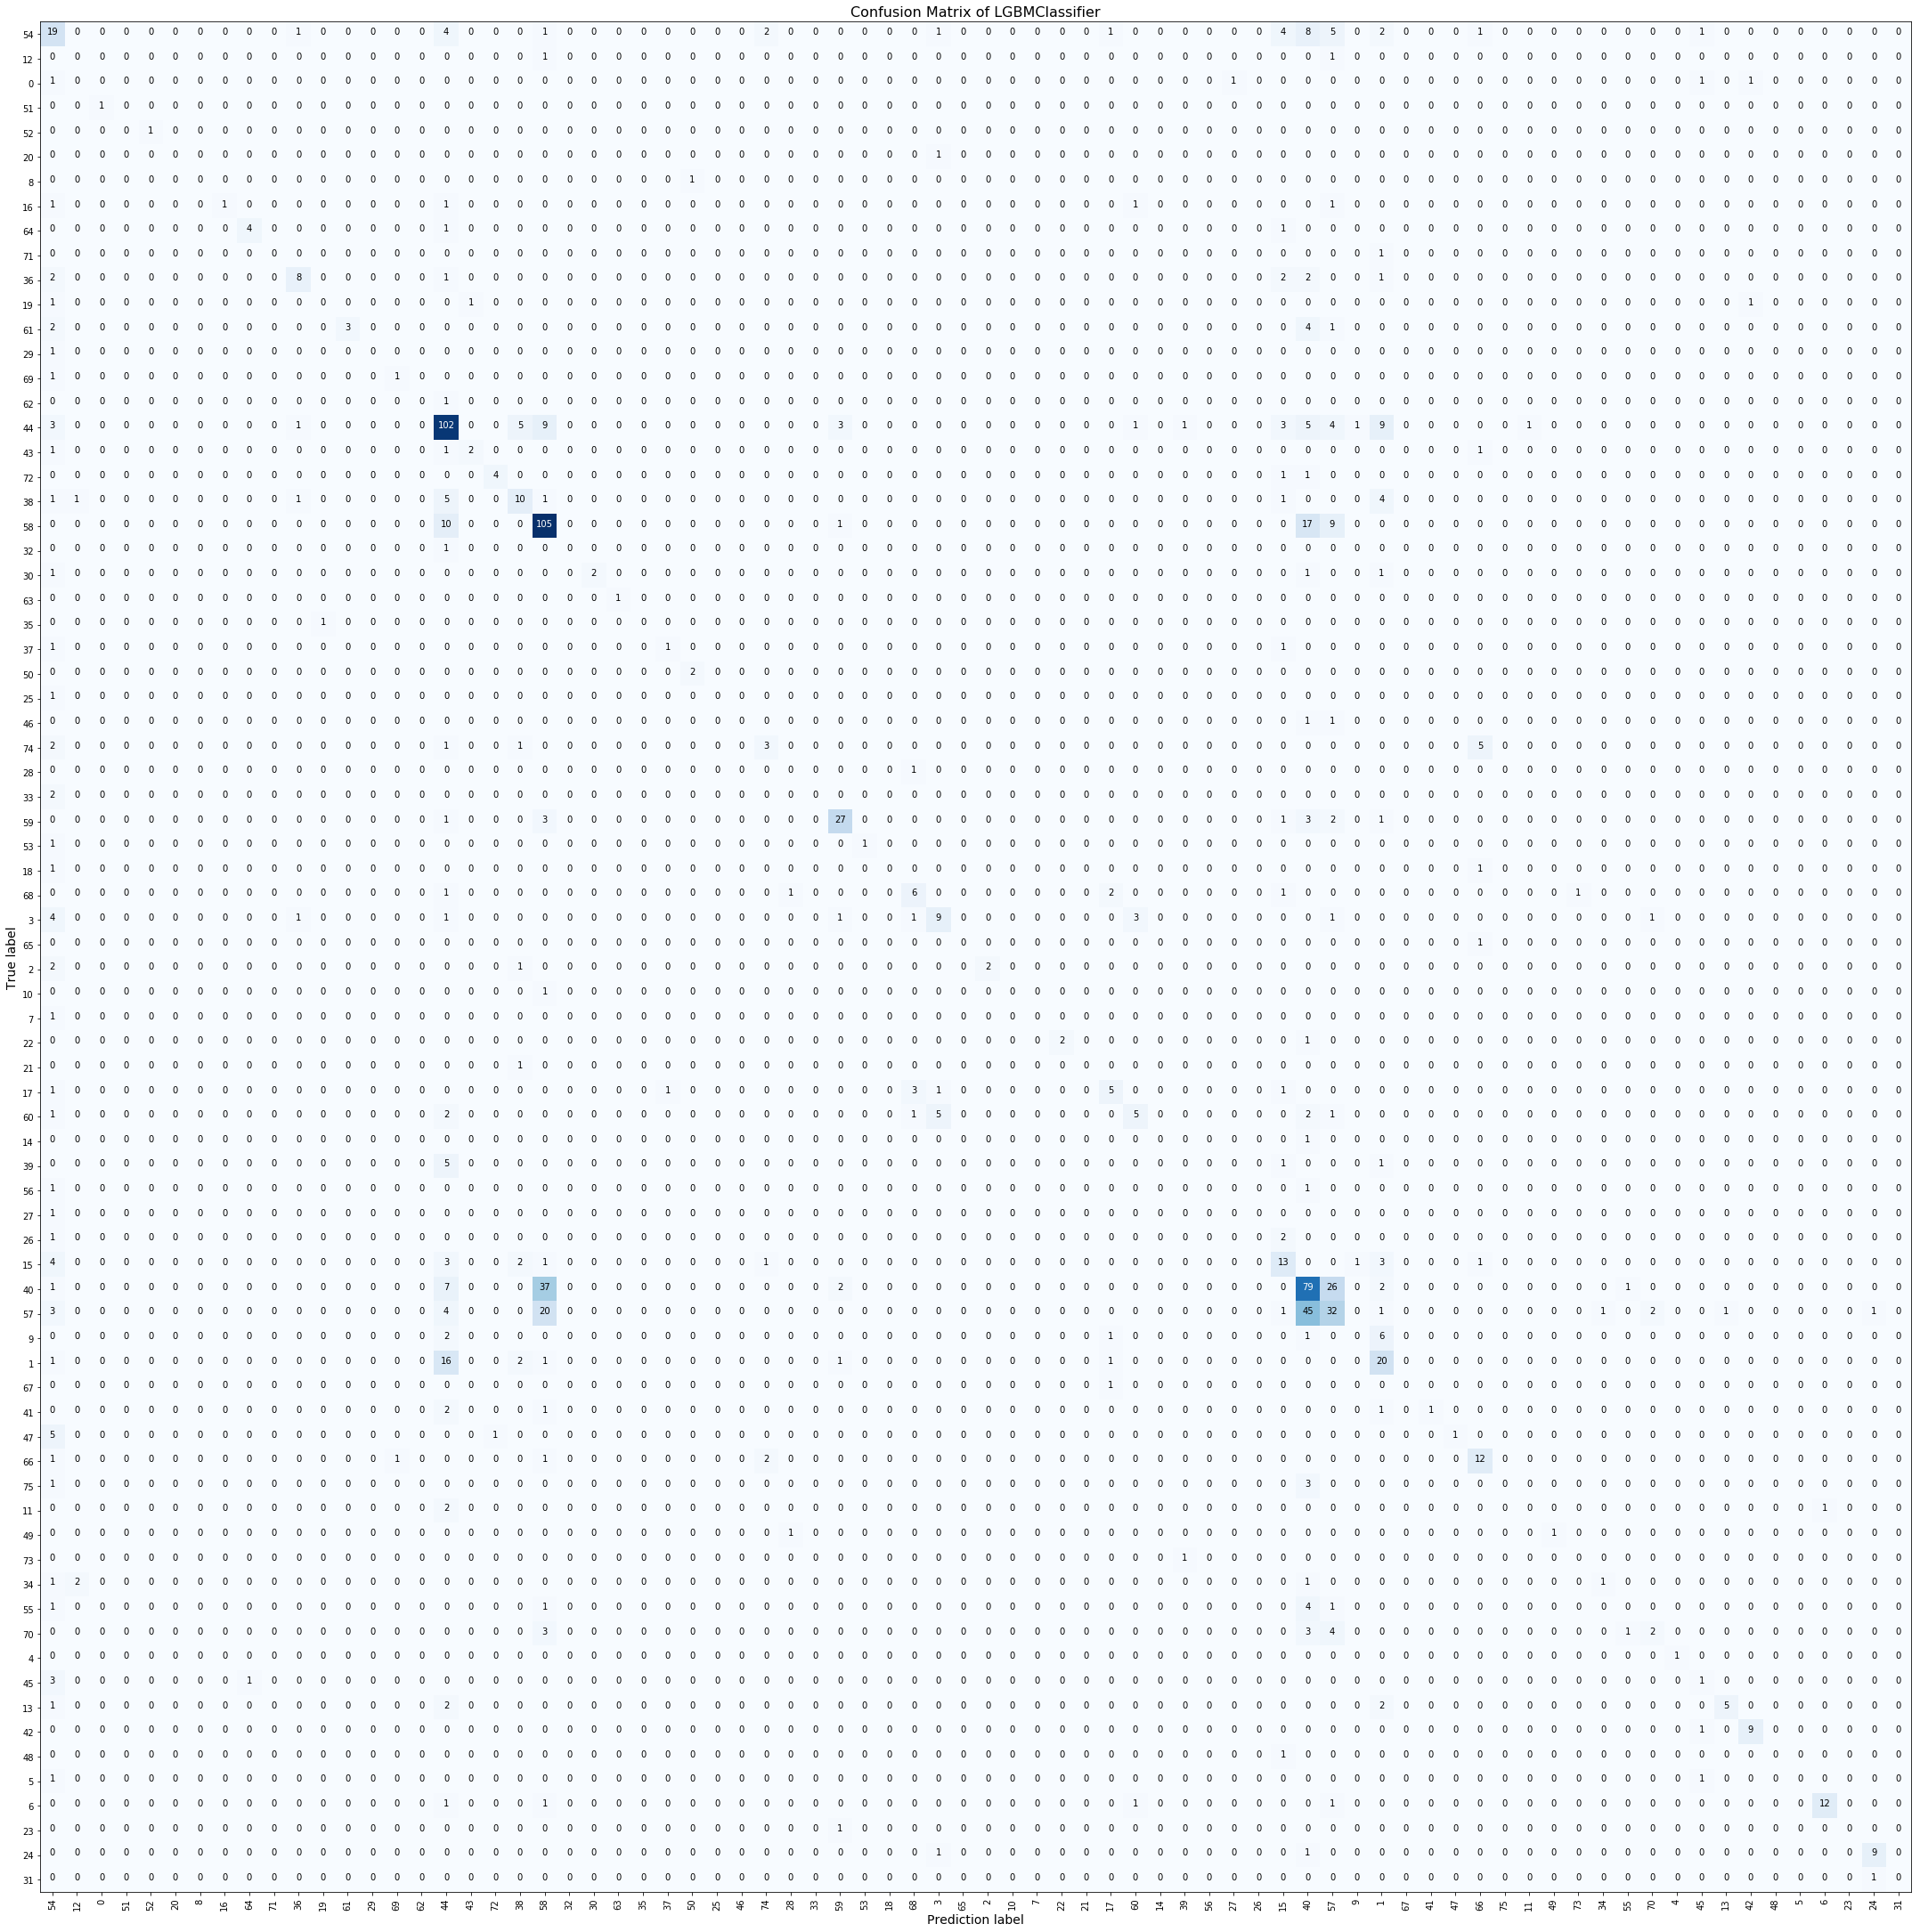

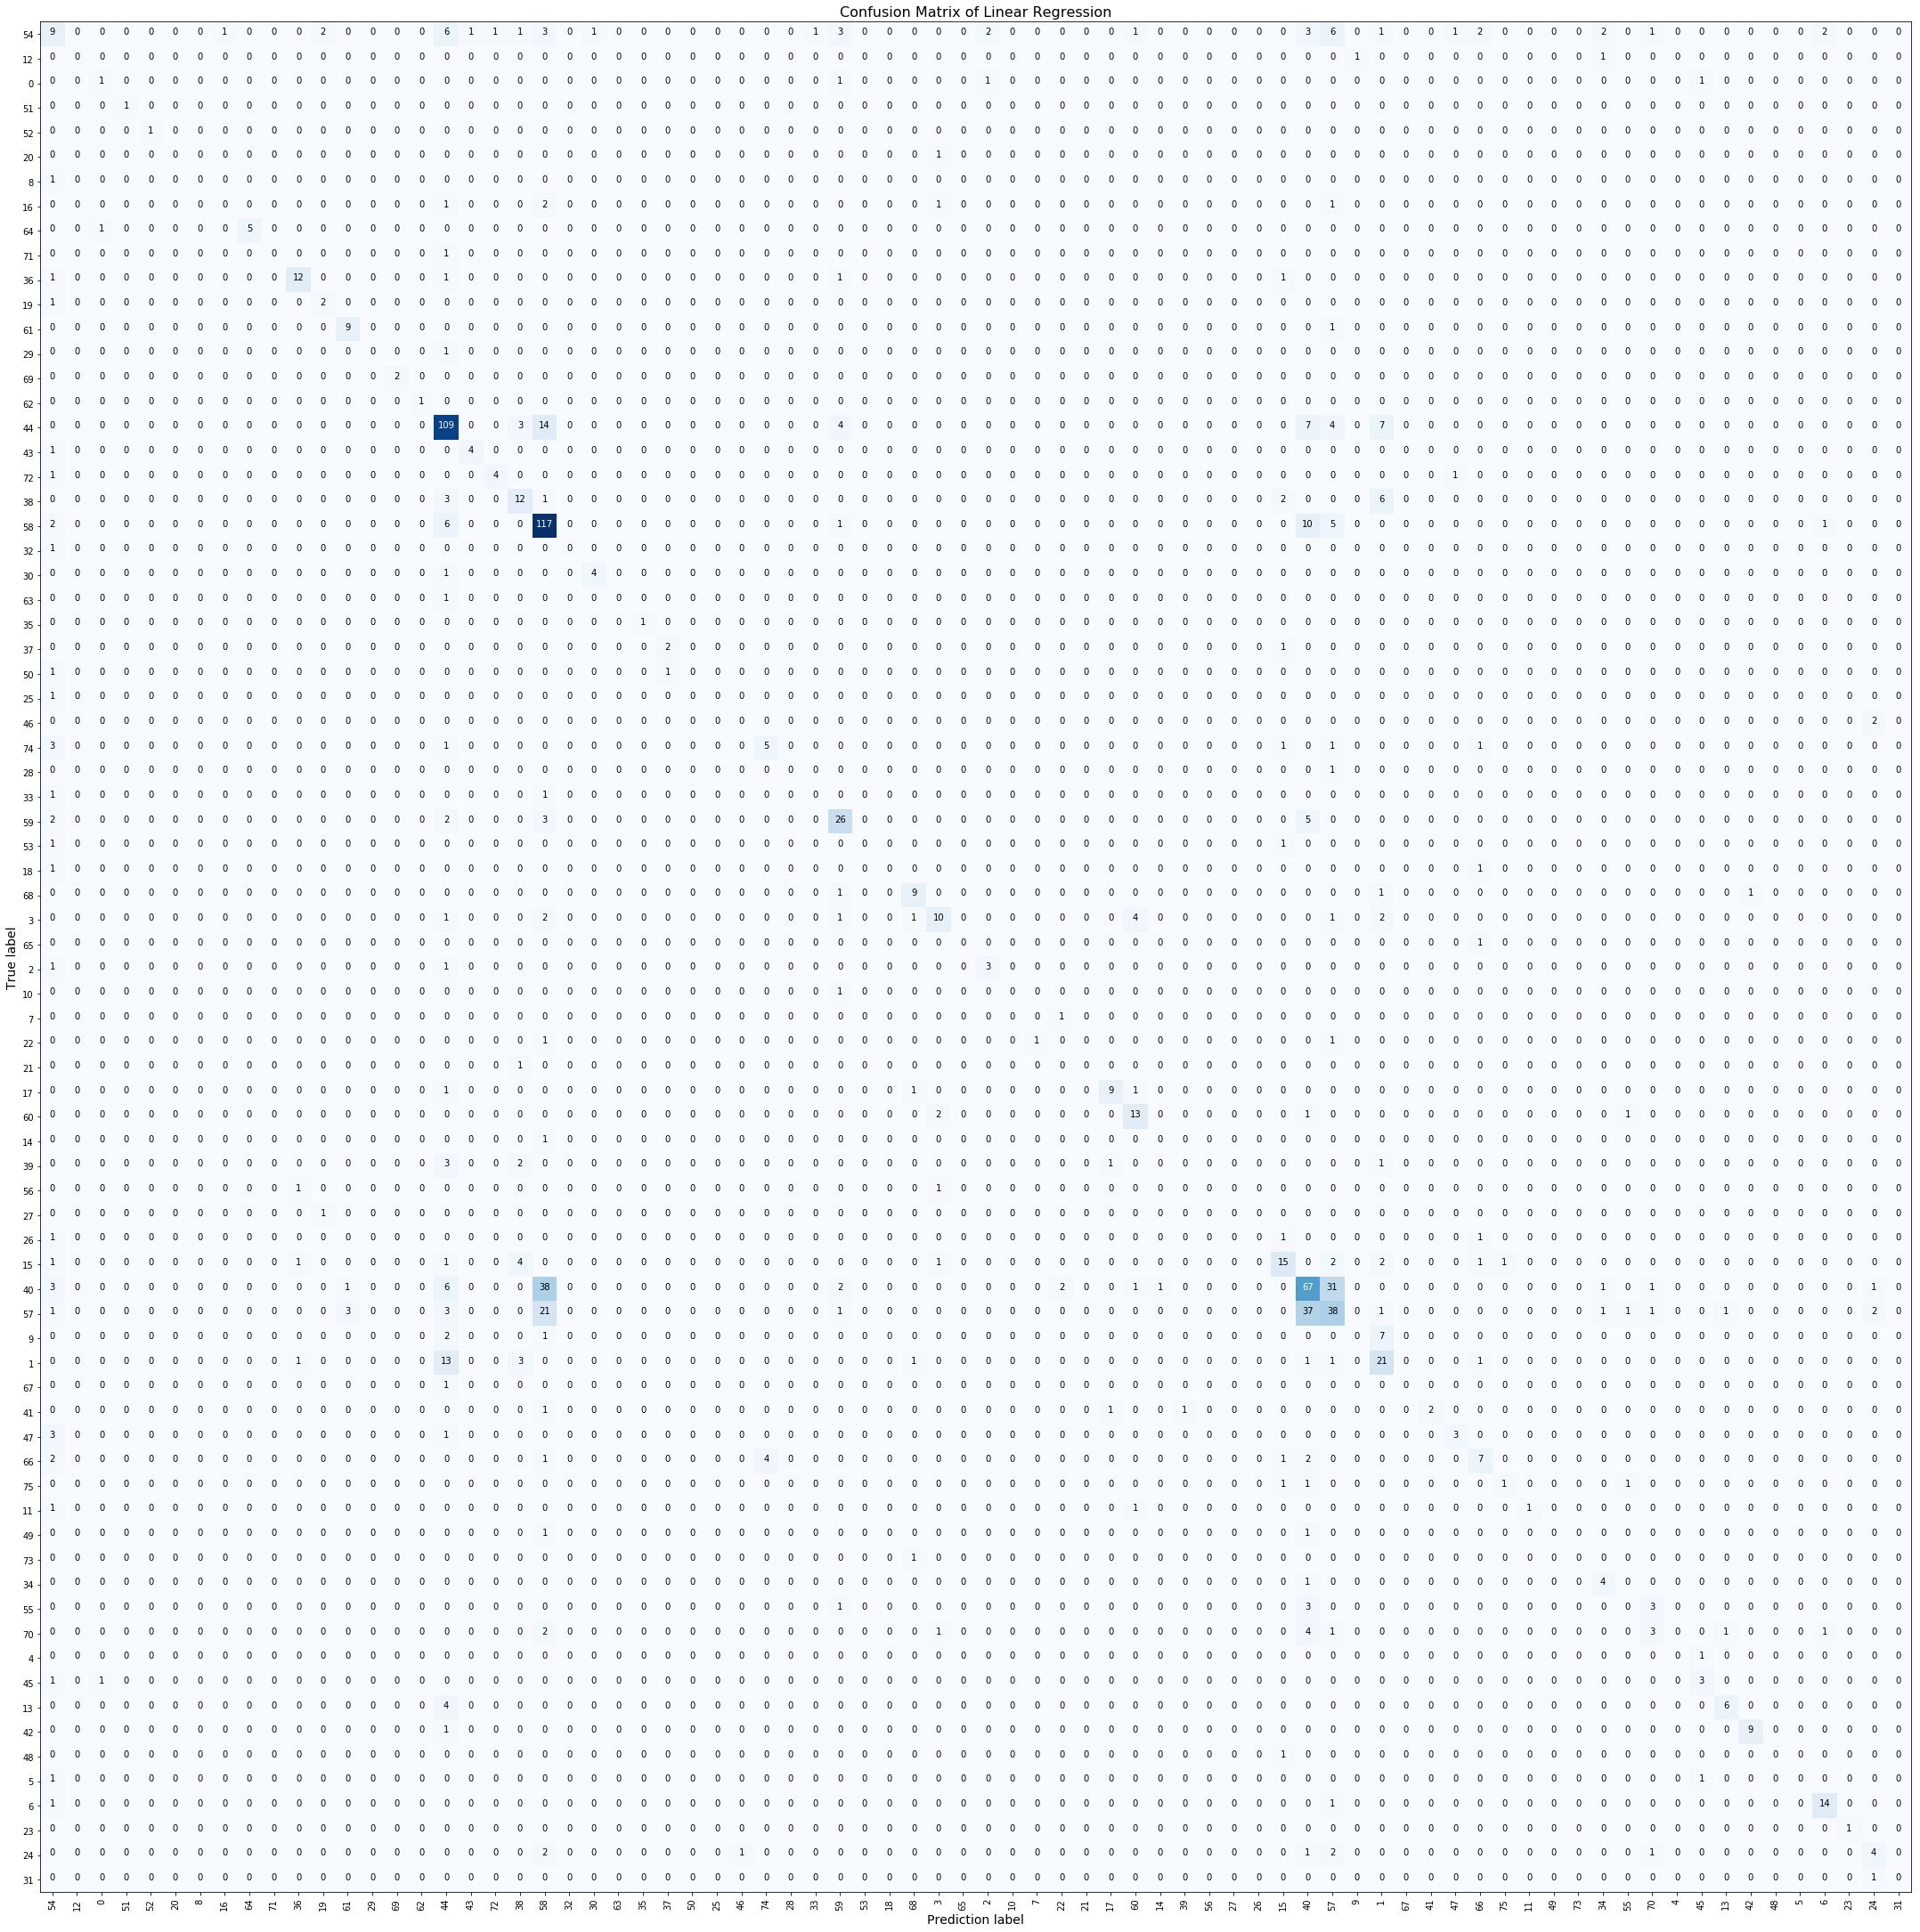

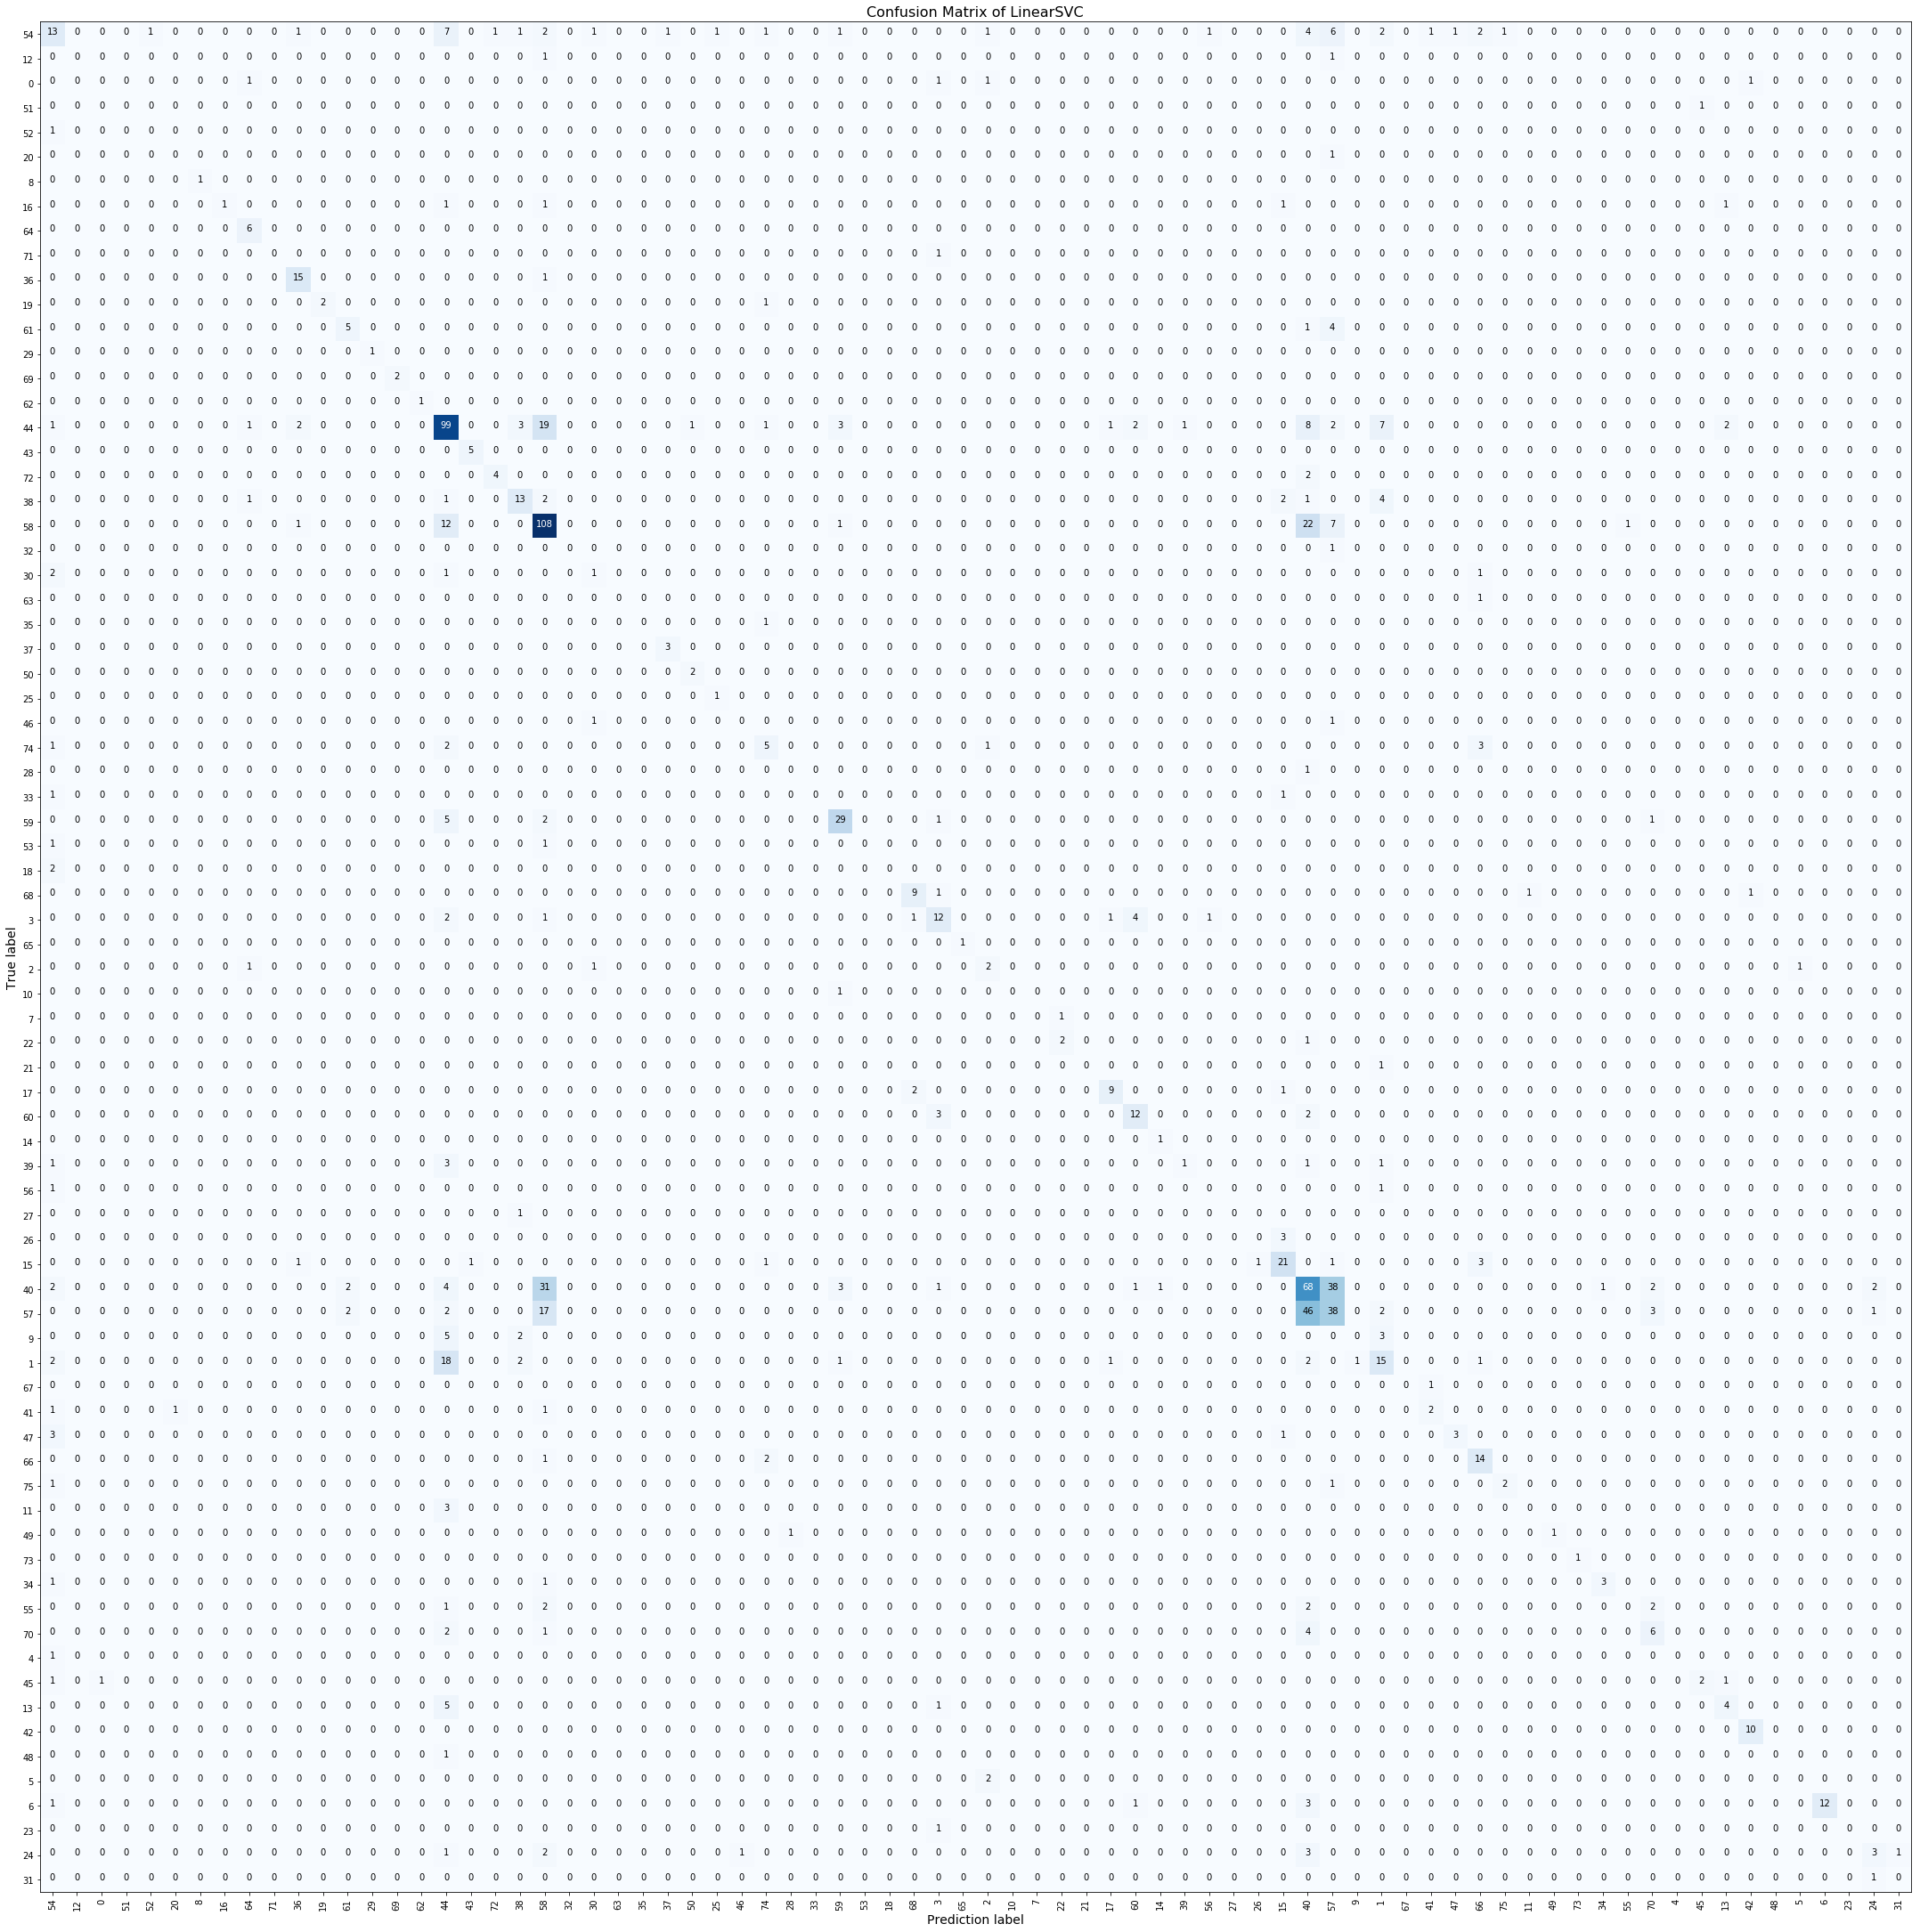

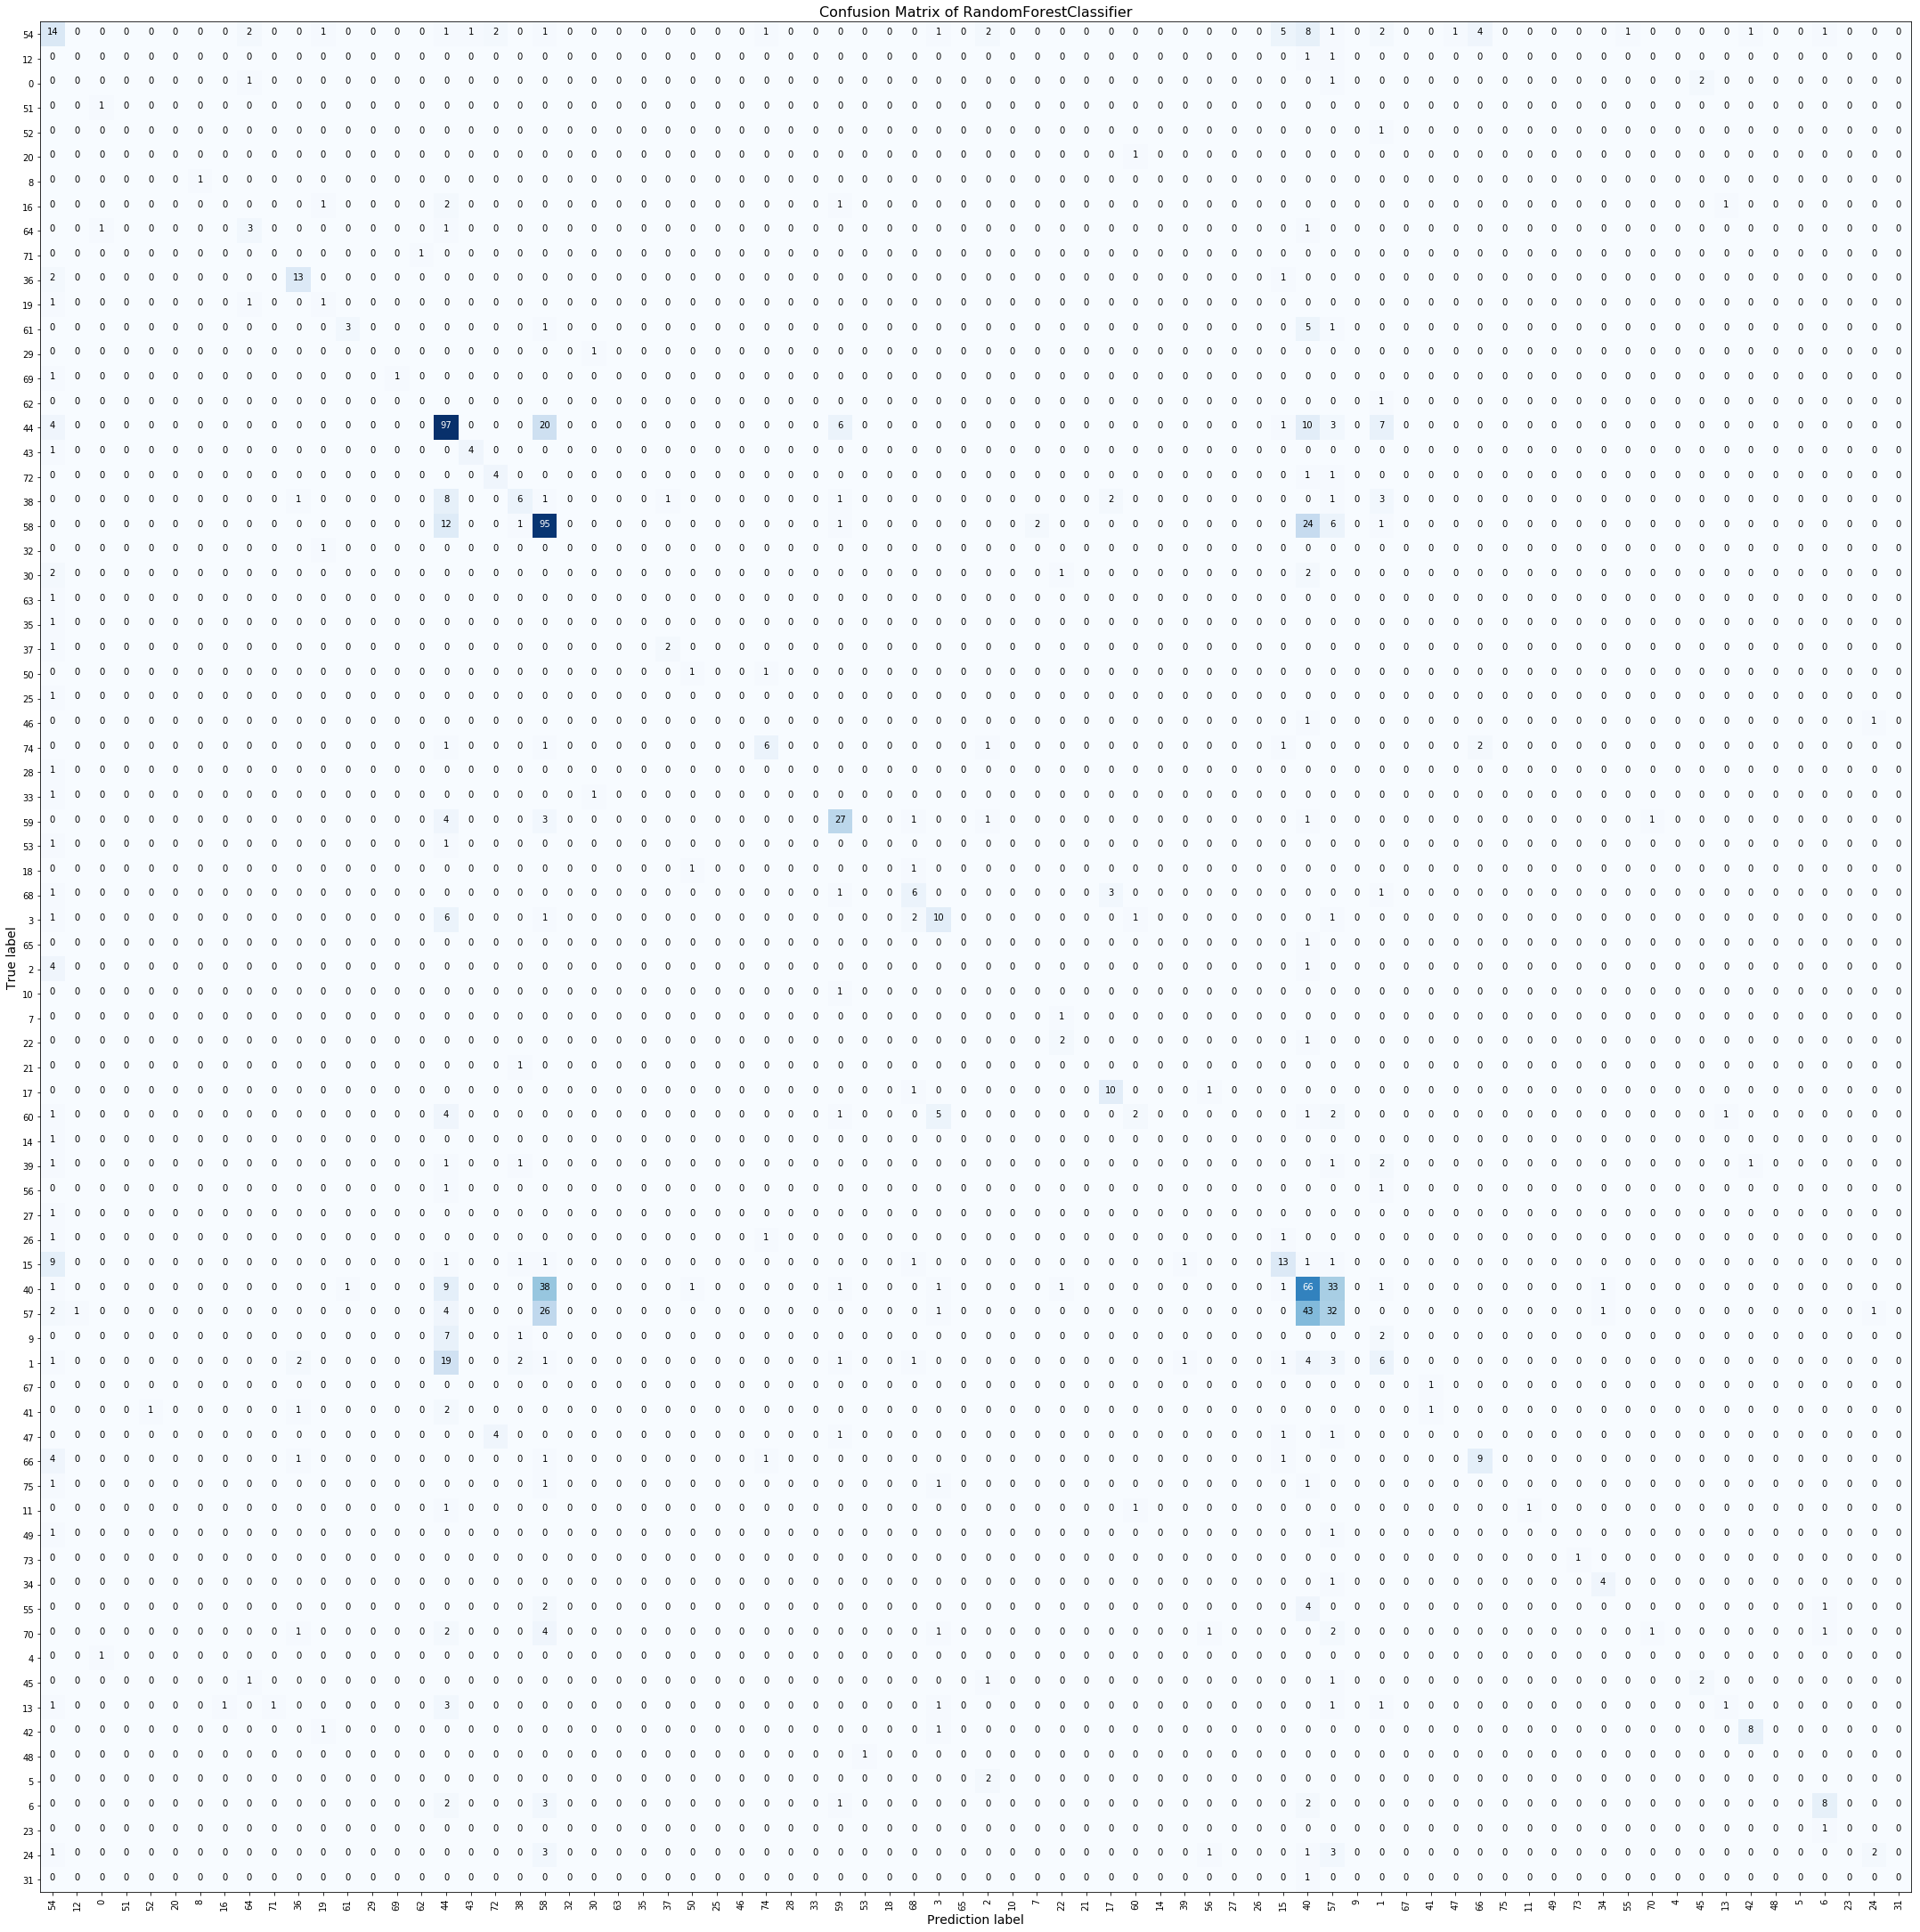

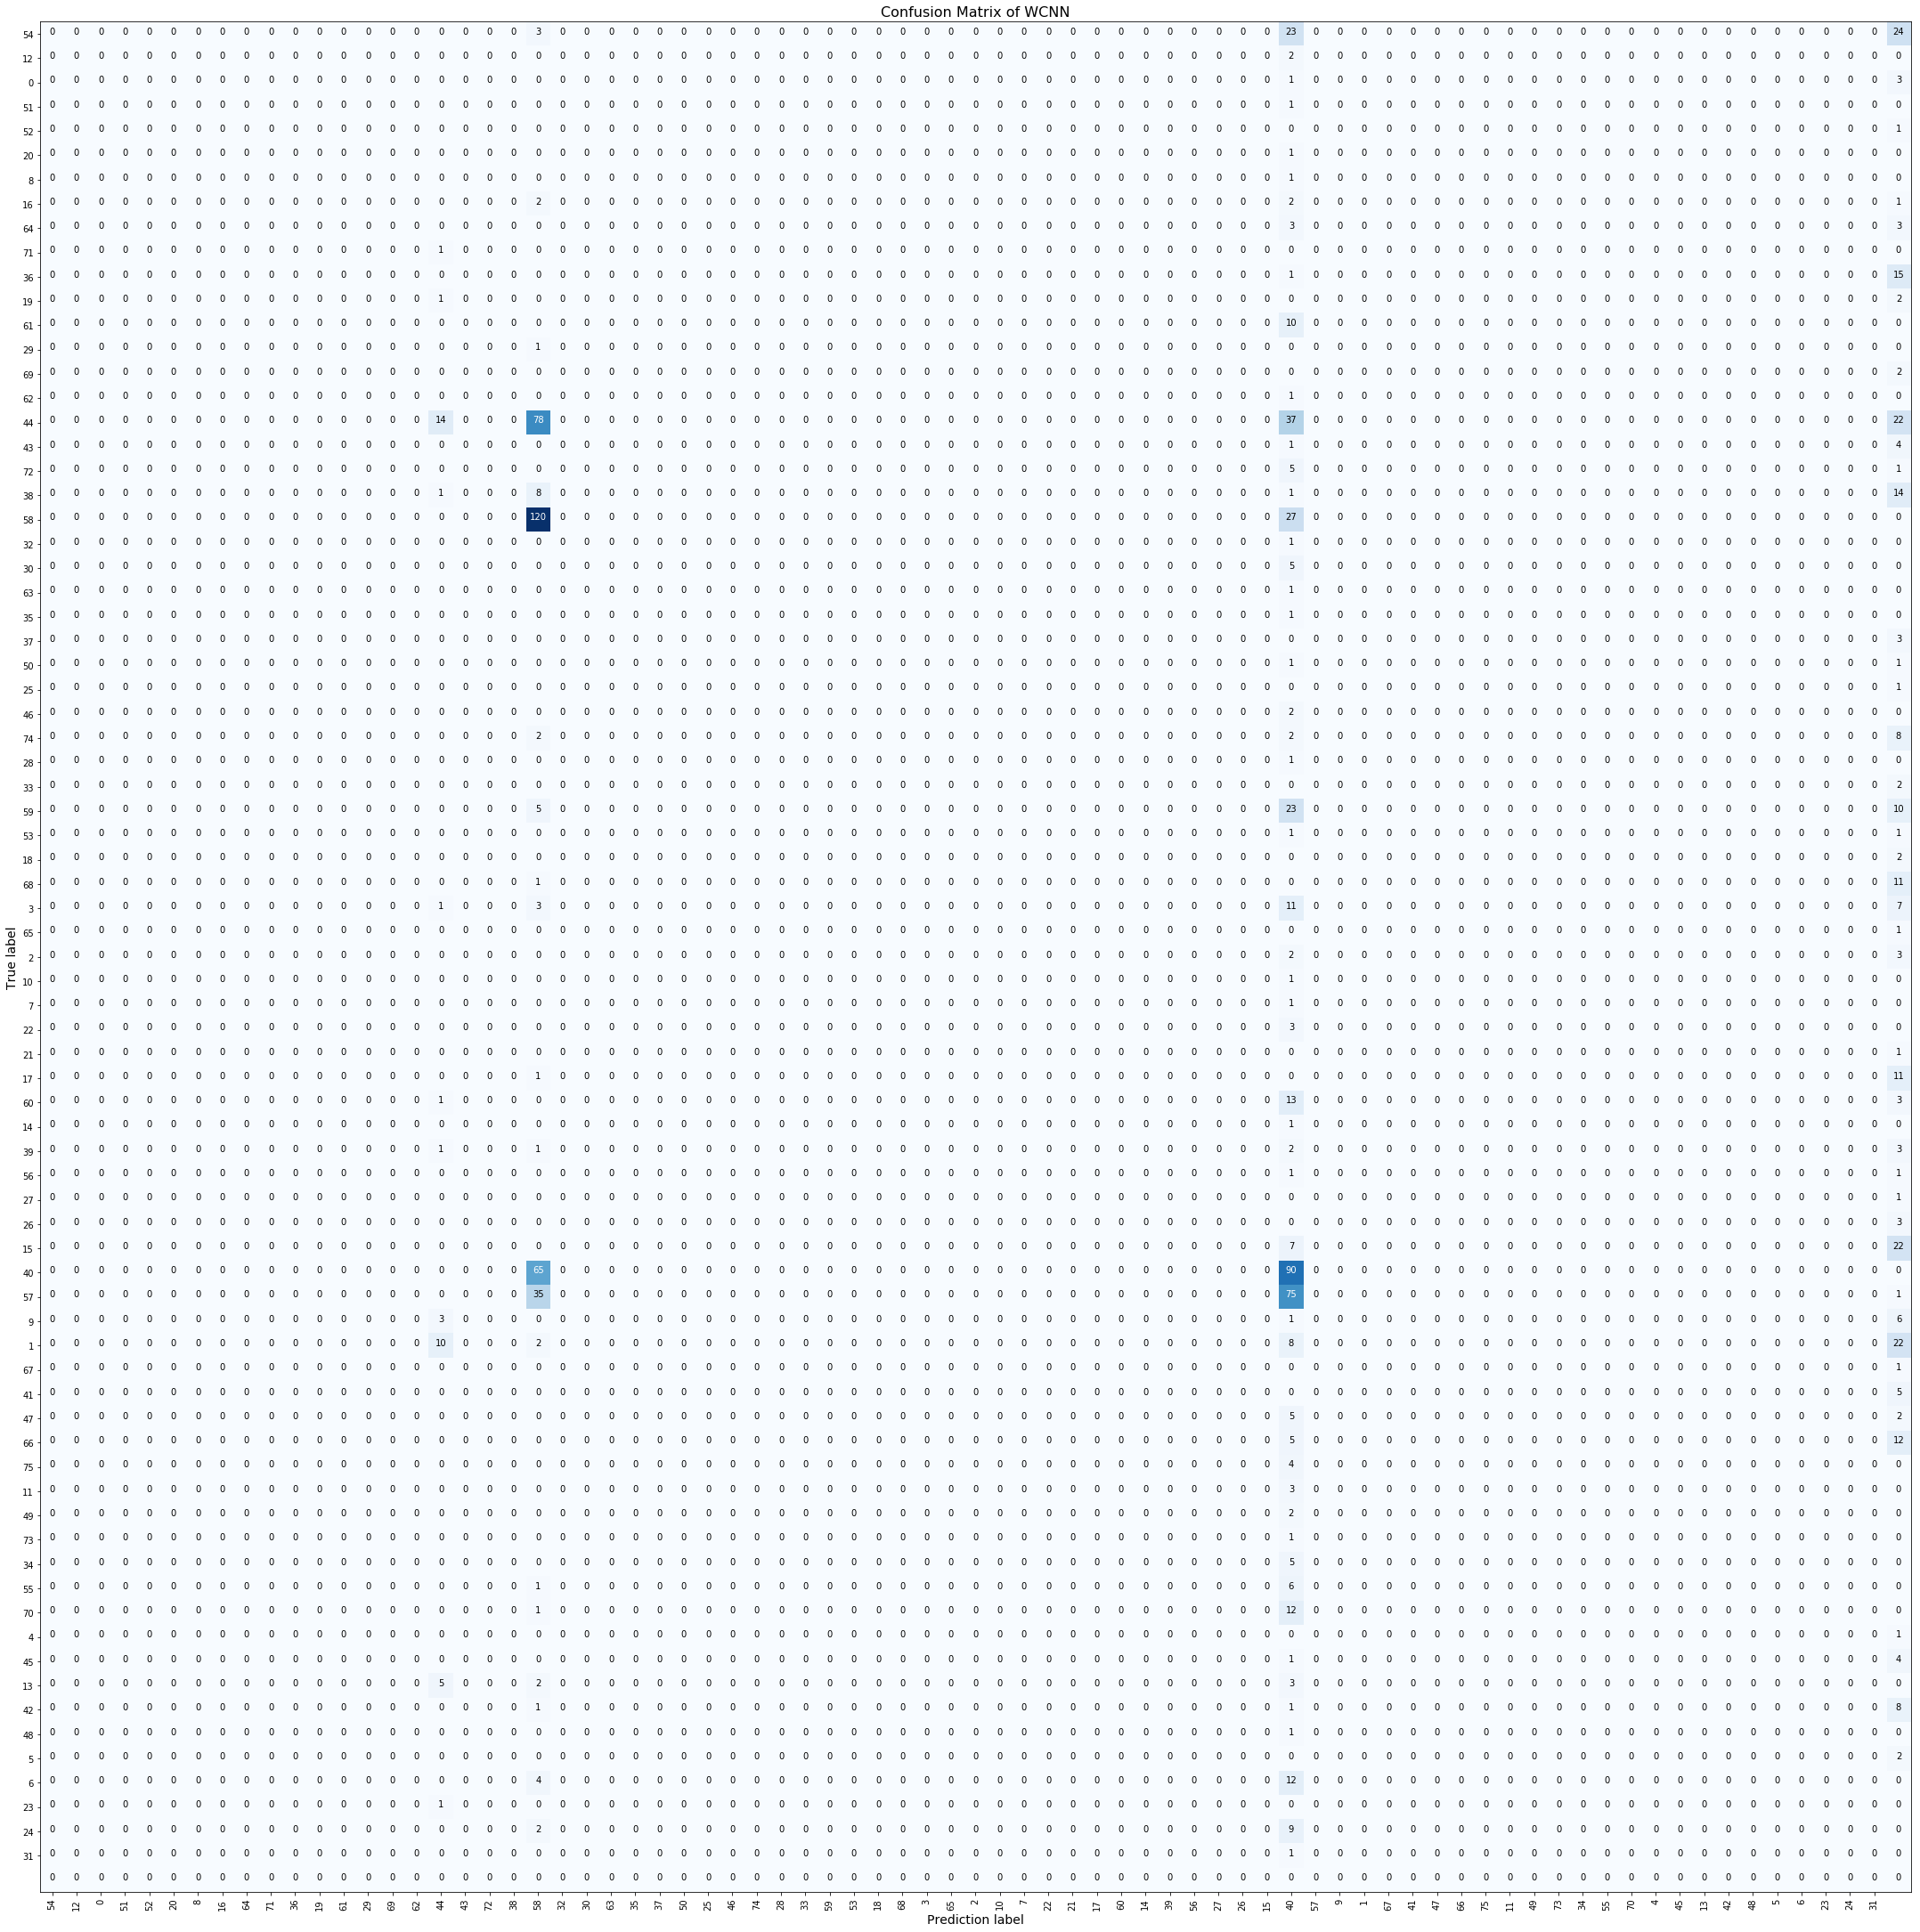

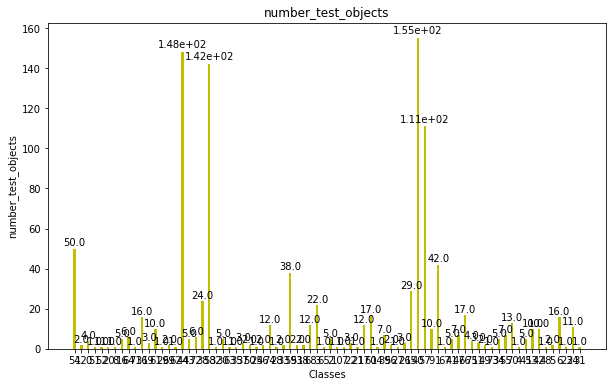

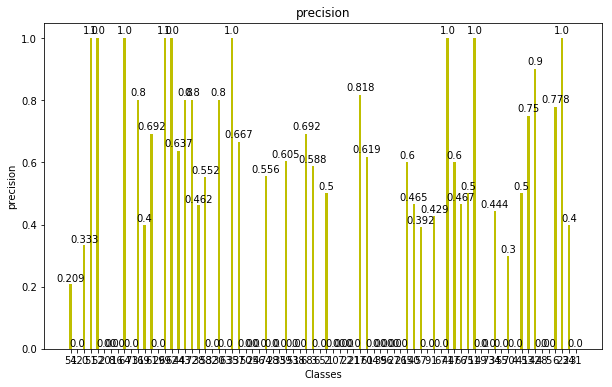

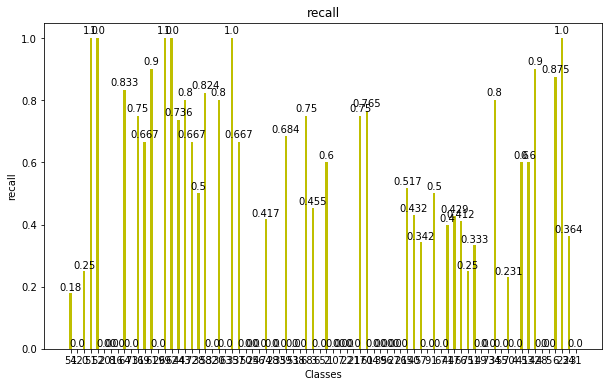

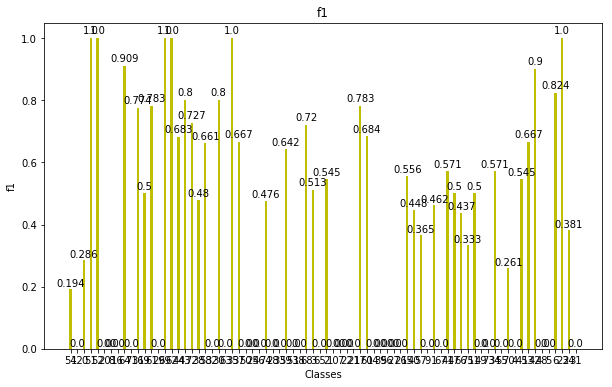

In [4]:
# Запуск перебора всех пайплайнов, параметр hyper_search отвечает за включение и выключение подбора гиперпараметров
# У нейронной модели, по дефолту стоит 20 эпох. Если включить подбор гиперпараметров,
# то считаться всё будет очень долго

Manager = PipelineManager(language, dataset_name, emb_name, emb_dim, hyper_search=False, root=root)
# Manager.run(linear_pipe, linear_struct, 'linear', pure_data)
Manager.run(neural_pipe, neural_struct, 'neural', pure_data)

### Вывод результатов

In [5]:
save_path = join('./results', language, dataset_name,
            '{}-{}-{}'.format(date.year, date.month, date.day))
path = join(save_path, '{}-{}-{}'.format(date.year, date.month, date.day) + '.txt')

isfile(path)

info = scrab_data(path)
table, [name_best_model, best_model] = get_table(info, save_path, root)

print('The best model: {}'.format(name_best_model))
table

/home/mks/projects/DeepBurtsev/
The best model: Linear Regression


,Accuracy,F1 macro,F1 weighted
Models,,,
LGBMClassifier,0.494350,0.298853,0.475344
Linear Regression,0.536723,0.397349,0.512066
LinearSVC,0.528704,0.406582,0.510037
RandomForestClassifier,0.435970,0.241778,0.409227
WCNN,0.209346,0.013723,0.132457


### Метрики для всех моделей

/home/mks/projects/DeepBurtsev/


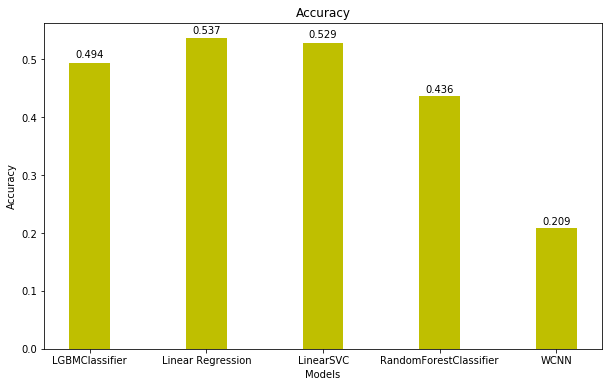

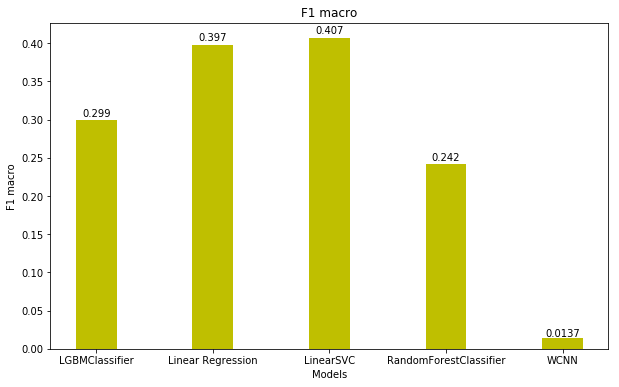

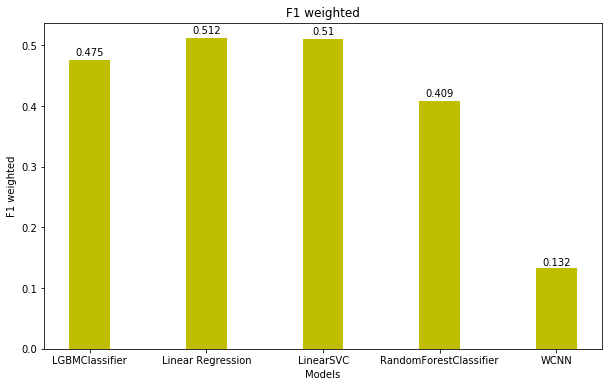

In [6]:
plot_i(date='{}-{}-{}'.format(date.year, date.month, date.day), path=save_path, root=root)

### Результаты лучшей модели по отдельным классам

/home/mks/projects/DeepBurtsev/


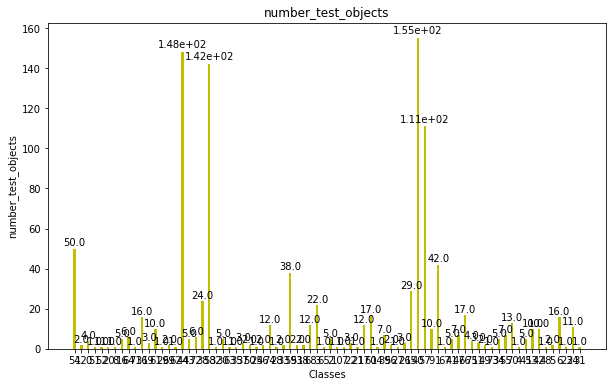

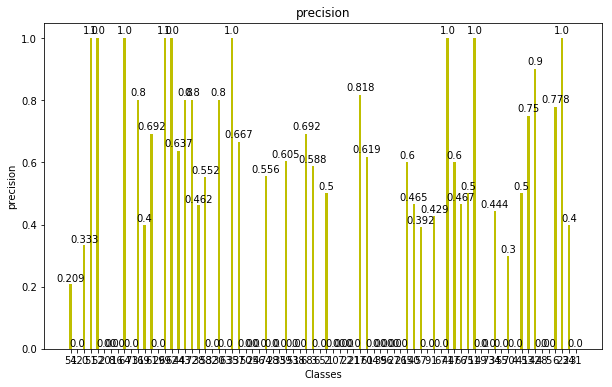

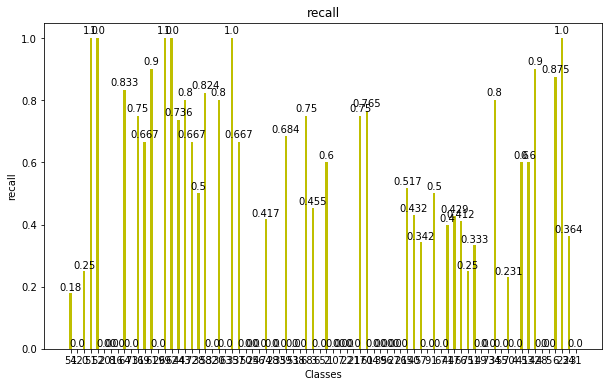

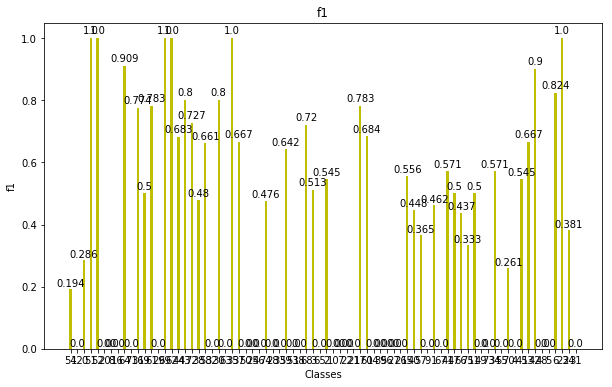

In [7]:
plot_k(date='{}-{}-{}'.format(date.year, date.month, date.day), path=save_path, root=root)